In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [74]:
data=pd.read_csv('Advertising.csv')

# 1. Explain the dataset

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


<font color='blue'>As per above the data is having an unnamed column which is actually serial no of each row and need to be dropped.
There are a total of 200 samples
The data is about advertising done through different media and the sales achieved.</font>

# 2. Check the summary statistics and discuss the max, min, avg, median, and percentiles.

In [75]:
data1 = data.drop('Unnamed: 0',axis=1)

In [76]:
data1.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# a)minimum values of data

In [16]:
minimum = np.min(data1)
print(minimum)

TV           0.7
Radio        0.0
Newspaper    0.3
Sales        1.6
dtype: float64


<font color='blue'>Minimum spend on advertisement and least sales value</font>

# b)maximum values of data

In [207]:
maximum = np.max(data1)
print(maximum)

TV           296.4
Radio         49.6
Newspaper    114.0
Sales         27.0
dtype: float64


# c)average values of data

In [30]:
data1.mean()

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         14.0225
dtype: float64

<font color='blue'>Comparitively more money is spent on advertisement through TV and less through Radio</font>

# d)median values of data

In [20]:
median_TV = np.median(data['TV'])
median_Radio = np.median(data['Radio'])
median_Newspaper = np.median(data['Newspaper'])
median_Sales = np.median(data['Sales'])

print('median of TV:',median_TV)
print('median of Radio:',median_Radio)
print('median of Newspaper:',median_Newspaper)
print("median of sales:",median_Sales)

median of TV: 149.75
median of Radio: 22.9
median of Newspaper: 25.75
median of sales: 12.9


In [29]:
data1.median()

TV           149.75
Radio         22.90
Newspaper     25.75
Sales         12.90
dtype: float64

# e)percentiles values of data

In [38]:
print("25th percentile of TV:   ", np.percentile(data['TV'], 25))
print("25th percentile of Radio:   ", np.percentile(data['Radio'], 25))
print("25th percentile of Newspaper:   ", np.percentile(data['Newspaper'], 25))
print("25th percentile of Sales:   ", np.percentile(data['Sales'], 25))


print("75th percentile of TV:   ", np.percentile(data['TV'], 75))
print("75th percentile of Radio:   ", np.percentile(data['Radio'], 75))
print("75th percentile of Newspaper:   ", np.percentile(data['Newspaper'], 75))
print("75th percentile of Sales:   ", np.percentile(data['Sales'], 75))

25th percentile of TV:    74.375
25th percentile of Radio:    9.975
25th percentile of Newspaper:    12.75
25th percentile of Sales:    10.375
75th percentile of TV:    218.825
75th percentile of Radio:    36.525
75th percentile of Newspaper:    45.1
75th percentile of Sales:    17.4


In [41]:
data1.quantile([.25,.5,.75])

,TV,Radio,Newspaper,Sales
0.25,74.375,9.975,12.75,10.375
0.50,149.750,22.900,25.75,12.900
0.75,218.825,36.525,45.10,17.400


# 3. Draw a scatter plot between TV and sales and write your insights

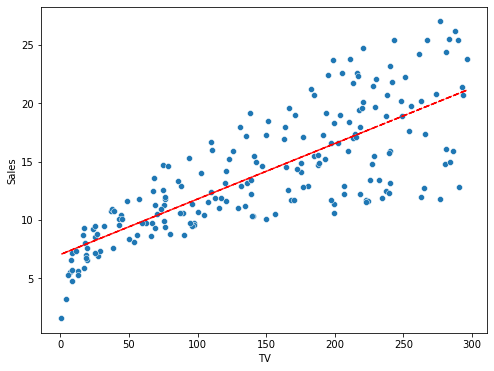

In [209]:
plt.figure(figsize=(8,6))
X=data1['TV']
Y=data1['Sales']
sns.scatterplot(x=X,y=Y,data=data1)
Z = np.polyfit(X, Y, 1)
P = np.poly1d(Z)
plt.plot(X,P(X),"r--")

<font color='blue'>As per above scatter plot with least squared fitting we can see the data points are not dispersed a lot and follows a strong positive linear relationship. So when the advertising in TV increases the sales figure also can be seen increasing</font>


# 4. Do a correlation analysis on the data set

In [66]:
data1.corr().round(2)

,TV,Radio,Newspaper,Sales
TV,1.00,0.05,0.06,0.78
Radio,0.05,1.00,0.35,0.58
Newspaper,0.06,0.35,1.00,0.23
Sales,0.78,0.58,0.23,1.00


<AxesSubplot:>

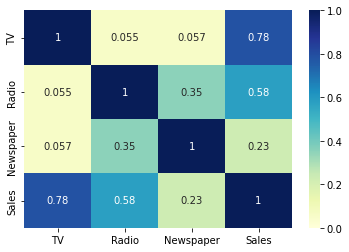

In [221]:
sns.heatmap(data=data1.corr(),annot=True,vmin=0,vmax=1,cmap='YlGnBu')

<font color='blue'>Advertisements on TV and Sales fig is having a high +ve correlation of 0.78
Where as advertisements mode on TV with respect to Radio and Newspapers have no correlation and is almost 0
Advertisements on Radio has a moderate correlation of 0.58 on Sales
Advertisements on Newspapers has a very less correlation of 0.23 only
There is a weak correlation between Newspaper and Radio advertisements</font>

# 5. Fit a linear regression model on the dataset

<font color='blue'>Since  Sales is having good correlation will check the regression on these with Sales as dependent variable and other as independent variable</font>

# MODEL using OLS.Linear model 

In [83]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [225]:
X=data.drop(['Sales','Unnamed: 0'],axis=1)
Y=data[["Sales"]]

In [226]:
model = sm.OLS(Y,X).fit()

In [227]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Mon, 06 Dec 2021   Prob (F-statistic):                   2.43e-171
Time:                        01:08:09   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [228]:
predictions = model.predict(X)
print(predictions)

0      21.941397
1      11.885691
2      12.290830
3      18.311216
4      13.107703
         ...    
195     3.109157
196     6.292321
197    11.695501
198    25.702168
199    14.542552
Length: 200, dtype: float64


In [241]:
model1=smf.ols(formula='Sales~TV',data=data).fit()

In [242]:
model1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [239]:
from sklearn.metrics import mean_squared_error

In [240]:
print('MSE :',mean_squared_error(Y,predictions))

MSE : 4.04521507106605


# MODEL using Sklearn model selection

In [161]:
data1.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [186]:
y=data1['Sales']
x=data1.drop(['Sales'],axis=1)

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)

In [189]:
from sklearn import linear_model

In [190]:
lr=linear_model.LinearRegression()

In [191]:
model=lr.fit(x_train,y_train)

In [192]:
predictions =model.predict(x_test)

In [193]:
print(y_test)

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
195     7.6
29     10.5
19     14.6
143    10.4
86     12.0
Name: Sales, dtype: float64


In [194]:
print(predictions)

[16.38348211 20.92434957 21.61495426 10.49069997 22.17690456 13.02668085
 21.10309295  7.31813008 13.56732111 15.12238649  8.92494113  6.49924401
 14.30119928  8.77233515  9.58665483 12.09485291  8.59621605 16.25337881
 10.16948105 18.85753401 19.5799036  13.15877029 12.25103735 21.35141984
  7.69607607  5.64686906 20.79780073 11.90951247  9.06581044  8.37295611
 12.40815899  9.89416076 21.42707658 12.14236853 18.28776857 20.18114718
 13.99303029 20.89987736 10.9313953   4.38721626  9.58213448 12.6170249
  9.93851933  8.06816257 13.45497849  5.25769423  9.15399537 14.09552838
  8.71029827 11.55102817]


In [195]:
from sklearn.metrics import mean_squared_error

In [196]:
print('MSE is',mean_squared_error(y_test,predictions))

MSE is 2.880023730094191


In [205]:
# R squared
model.score(x_test,y_test)

0.8935163320163658

<font color='blue'>OLS prediction model explains 98.20 % of variation  data with MSE of 4.045 for full sample size 200
where as Sklearn linear regression explain 89.35% data with MSE of 2.88 for test sample of  50</font>